<a href="https://colab.research.google.com/github/joyceee916/ATMS597-Project-6-Group-C/blob/master/Project6_Joyce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras 

In [101]:
df = pd.read_csv('/content/drive/My Drive/ATMS 597/Project6/openFEMA_claims20190831.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,11,15,22,23,31,32,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# Keep only potentially useful columns 
df = df[['basefloodelevation', 'policycount', 'elevatedbuildingindicator', 'elevationdifference', 'floodzone', 'originalconstructiondate', 'originalnbdate', 'amountpaidonbuildingclaim', 'amountpaidoncontentsclaim', 'amountpaidonincreasedcostofcomplianceclaim', 'postfirmconstructionindicator', 'ratemethod', 'state', 'totalbuildinginsurancecoverage', 'totalcontentsinsurancecoverage', 'yearofloss', 'dateofloss']]

# Convert negative values for claims to their positive values (because a negative value means that the check issued to the policyholder wasn't cashed in, and needs to be reissued)
df.amountpaidonbuildingclaim = df.amountpaidonbuildingclaim.abs()
df.amountpaidoncontentsclaim = df.amountpaidoncontentsclaim.abs()
df.amountpaidonincreasedcostofcomplianceclaim = df.amountpaidonincreasedcostofcomplianceclaim.abs()

# Replace NaN values for claims with 0
df.amountpaidonbuildingclaim.fillna(0, inplace=True)
df.amountpaidoncontentsclaim.fillna(0, inplace=True)
df.amountpaidonincreasedcostofcomplianceclaim.fillna(0, inplace=True)

# Create a new column that is the sum of all of the amounts paid 
df['totalamountpaid'] = df['amountpaidonbuildingclaim'] + df['amountpaidoncontentsclaim'] + df['amountpaidonincreasedcostofcomplianceclaim']

# Delete intermediate columns 
df.drop(columns=['amountpaidonbuildingclaim', 'amountpaidoncontentsclaim', 'amountpaidonincreasedcostofcomplianceclaim'], inplace=True)

# Replace elevation difference values that are 999.0 with NaN 
df.replace({'elevationdifference': {999.0: np.nan}}, inplace=True)

In [104]:
# Converting categorical variables: one-hot encoding 

# Unique categories in each column?
for col in df.columns: 
    print(col, ':', len(df[col].unique()), 'labels')



basefloodelevation : 8911 labels
policycount : 390 labels
elevatedbuildingindicator : 3 labels
elevationdifference : 376 labels
floodzone : 97 labels
originalconstructiondate : 30176 labels
originalnbdate : 15814 labels
postfirmconstructionindicator : 3 labels
ratemethod : 29 labels
state : 56 labels
totalbuildinginsurancecoverage : 10799 labels
totalcontentsinsurancecoverage : 2883 labels
yearofloss : 49 labels
dateofloss : 15470 labels
totalamountpaid : 1297376 labels


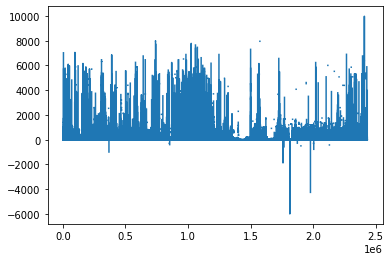

In [0]:
plt.plot(df.basefloodelevation)

In [0]:
df.basefloodelevation.describe()

count    483587.000000
mean         71.337873
std         299.905778
min       -6002.000000
25%           7.000000
50%           9.000000
75%          14.000000
max        9980.000000
Name: basefloodelevation, dtype: float64

In [103]:
df

,basefloodelevation,policycount,elevatedbuildingindicator,elevationdifference,floodzone,originalconstructiondate,originalnbdate,postfirmconstructionindicator,ratemethod,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,dateofloss,totalamountpaid
0,NaN,1.0,N,NaN,X,1963-01-01,1997-01-11,N,7,CA,200000.0,50000.0,1998,1998-02-07,0.00
1,NaN,1.0,N,NaN,X,1967-07-01,1990-07-12,N,7,LA,100000.0,40000.0,2005,2005-08-29,0.00
2,NaN,1.0,N,NaN,X,1972-01-01,1997-07-24,N,1,FL,100000.0,50000.0,1998,1998-09-28,10533.21
3,NaN,1.0,N,NaN,X,1960-01-01,1993-10-01,N,7,SC,100000.0,25000.0,1994,1994-10-07,2906.00
4,NaN,1.0,N,NaN,X,1988-01-01,1996-01-11,Y,7,FL,100000.0,25000.0,1996,1996-03-11,5420.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432883,9.0,1.0,N,1.0,AHB,1985-01-01,2003-12-06,Y,1,FL,131000.0,45000.0,2005,2005-08-26,6123.27
2432884,9.0,1.0,N,1.0,AHB,1990-01-01,2004-02-04,Y,1,FL,153300.0,76700.0,2005,2005-08-25,5010.88
2432885,10.0,1.0,N,-1.0,AE,1959-01-01,2004-07-16,N,1,FL,245000.0,100000.0,2005,2005-06-20,8335.35
2432886,NaN,1.0,N,NaN,AE,1959-01-01,2004-07-16,N,1,FL,245000.0,100000.0,2005,2005-08-25,2396.44
